# Preprocessing of the dataset

The knowledge created on this dataset will be exported as transformers and saved on **libs/transformers.py** so it can be reusable in sklearn pipelines 

In [2]:
import sys
import os
sys.path.append(os.getcwd())

import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import feature_engine.transformation as vt

In [35]:
df = pd.read_csv('../beijing.csv', encoding="gbk")

/tmp/ipykernel_53690/809342345.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../beijing.csv', encoding="gbk")


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [36]:
df2 = df.drop(columns=["Cid", "id", "DOM", "url", "price", "followers"])

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   tradeTime            318851 non-null  object 
 3   totalPrice           318851 non-null  float64
 4   square               318851 non-null  float64
 5   livingRoom           318851 non-null  object 
 6   drawingRoom          318851 non-null  object 
 7   kitchen              318851 non-null  int64  
 8   bathRoom             318851 non-null  object 
 9   floor                318851 non-null  object 
 10  buildingType         316830 non-null  float64
 11  constructionTime     318851 non-null  object 
 12  renovationCondition  318851 non-null  int64  
 13  buildingStructure    318851 non-null  int64  
 14  ladderRatio          318851 non-null  float64
 15  elevator         

In [20]:
# multiply two columns in dataframe
df["checkPrice"] = df["price"] * df["square"]
df["checkPrice"] = df["checkPrice"].apply(lambda x: int(x/10000))

In [21]:
df["checkPrice"].unique()

array([ 415,  575, 1030, ..., 1956, 1512, 1222])

In [26]:
df["diffPrice"] = df["checkPrice"] - df["totalPrice"]

In [29]:
df["diffPrice"].max()

0.0

In [9]:
df[df.constructionTime.isin(['0','1'])].var()

/tmp/ipykernel_53690/1919873252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.constructionTime.isin(['0','1'])].var()


Lng                    1.190499e-02
Lat                    3.498630e-03
Cid                    1.137870e+14
DOM                    0.000000e+00
followers              0.000000e+00
totalPrice             1.277858e+04
price                  6.748968e+07
square                 1.133575e+03
kitchen                6.360887e-01
buildingType           3.145434e-02
renovationCondition    1.572581e-01
buildingStructure      1.129032e-01
ladderRatio            0.000000e+00
elevator                        NaN
fiveYearsProperty               NaN
subway                          NaN
district               1.509577e+01
communityAverage       3.780416e+08
dtype: float64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

# Deleting assured columns

In [4]:
df.drop(['url'], axis=1, inplace=True)

# Mutating or one-hot-encoding columns since string stuff 

In [5]:
# convert tradeTime date column to timestamp
df['tradeYear'] = pd.to_datetime(df['tradeTime']).dt.year
df['tradeMonth'] = pd.to_datetime(df['tradeTime']).dt.month
df.drop('tradeTime', axis=1, inplace=True)

In [6]:
# transforming id column to numeric
df['id'] = df.index + 1

In [37]:
# This column unfortunately has the same labels as string and int object.
# There is a label '#NAME?' which is not clear for what use it is. Since only 32 of them, we can fill it with the median if the column (Since discrete values)
df.groupby('livingRoom')['id'].nunique()

livingRoom
0        16
1     53483
2    121560
3     50956
4      5237
5       821
6       160
7        21
8         2
9         1
Name: id, dtype: int64

In [8]:
def mapper(x):
    if x == '#NAME?':
        return np.nan
    else: return int(x)
df['livingRoom'] = df['livingRoom'].apply(mapper)
df['livingRoom'].fillna(df['livingRoom'].median(), inplace=True)
df['livingRoom'] = df['livingRoom'].astype(int)
df.groupby('livingRoom')['id'].nunique()

livingRoom
0        28
1     82386
2    160621
3     67611
4      6821
5      1107
6       228
7        37
8         7
9         5
Name: id, dtype: int64

In [9]:
chars = ['中', '低', '底', '顶', '高']
def mapper(x):
    for c in chars:
        if c in str(x):
            return np.nan
    return int(x)
df['drawingRoom'] = df['drawingRoom'].apply(mapper)
df['drawingRoom'].fillna(df['drawingRoom'].median(), inplace=True)
df['drawingRoom'] = df['drawingRoom'].astype(int)
df.groupby('drawingRoom')['id'].nunique()

drawingRoom
0     19686
1    225691
2     72502
3       918
4        47
5         7
Name: id, dtype: int64

In [10]:
chars = ['未知']
def mapper(x):
    for c in chars:
        if c in str(x):
            return np.nan
    return int(x)
df['bathRoom'] = df['bathRoom'].apply(mapper)
df['bathRoom'].fillna(df['bathRoom'].median(), inplace=True)
df['bathRoom'] = df['bathRoom'].astype(int)
df.groupby('bathRoom')['id'].nunique()

bathRoom
0          915
1       261490
2        52606
3         3240
4          489
5           69
6            9
7            3
1990         2
1994         1
1996         1
2000         3
2003         7
2004         4
2005         2
2006         9
2011         1
Name: id, dtype: int64

In [11]:
df['floorType'] = df['floor'].copy()
def mapper(x):
    splitted = x.split(' ')
    finalStr = x
    if len(splitted) == 2:
        finalStr = splitted[0]
    translations = {
        '中': 'middle',
        '低': 'low',
        '底': 'bottom',
        '未知': np.nan,
        '混合结构': 'hybrid',
        '钢混结构': 'steel',
        '顶': 'top',
        '高': 'high'
    }
    return translations[finalStr]
    
df['floorType'] = df['floorType'].apply(mapper)
df.groupby('floorType')['id'].nunique()

floorType
bottom     26080
high       70094
hybrid        15
low        64136
middle    119832
steel         17
top        37406
Name: id, dtype: int64

In [12]:
def mapper(x):
    splitted = x.split(' ')
    if len(splitted) == 2:
        return splitted[1]
    else:
        return np.nan
df['floor'] = df['floor'].apply(mapper)
df['floor'].fillna(df['floor'].median(), inplace=True)
df['floor'] = df['floor'].astype(int)

In [13]:
df.groupby('floor')['id'].nunique()

floor
1        332
2        185
3       1098
4       3023
5      13467
6     107791
7       9961
8       2342
9       7109
10      5707
11      9675
12      9118
13      4311
14      8837
15      7283
16     15999
17      5233
18     23013
19      4721
20     10025
21      9018
22      9228
23      3539
24     13594
25      6403
26      6886
27      4854
28      7449
29      1836
30      2472
31       670
32      2477
33       571
34       555
35         4
36        12
37        16
42        34
57         2
63         1
Name: id, dtype: int64

In [14]:
df.groupby('buildingType')['id'].nunique()
df = df[df['buildingType'] > 1]  
df['buildingType'] = df['buildingType'].astype(int)
df.groupby('buildingType')['id'].nunique()

buildingType
2       137
3     59715
4    172405
Name: id, dtype: int64

In [15]:
df.groupby('constructionTime')['id'].nunique()

constructionTime
1914        1
1934        2
1944        1
1950       12
1952        5
        ...  
2013     2032
2014     2037
2015      388
2016       77
未知      12374
Name: id, Length: 70, dtype: int64

In [16]:
chars = ['未知']
def mapper(x):
    for c in chars:
        if c in str(x):
            return np.nan
    return float(x)
df['constructionTime'] = df['constructionTime'].apply(mapper)
df['constructionTime'].fillna(df['constructionTime'].median(), inplace=True)
df['constructionTime'] = df['constructionTime'].astype(int)
df.groupby('constructionTime')['id'].nunique()

constructionTime
1914       1
1934       2
1944       1
1950      12
1952       5
        ... 
2012    4234
2013    2032
2014    2037
2015     388
2016      77
Name: id, Length: 69, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232257 entries, 2 to 318850
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   232257 non-null  int64  
 1   Lng                  232257 non-null  float64
 2   Lat                  232257 non-null  float64
 3   Cid                  232257 non-null  int64  
 4   DOM                  117692 non-null  float64
 5   followers            232257 non-null  int64  
 6   totalPrice           232257 non-null  float64
 7   price                232257 non-null  int64  
 8   square               232257 non-null  float64
 9   livingRoom           232257 non-null  int64  
 10  drawingRoom          232257 non-null  int64  
 11  kitchen              232257 non-null  int64  
 12  bathRoom             232257 non-null  int64  
 13  floor                232257 non-null  int64  
 14  buildingType         232257 non-null  int64  
 15  constructionTime 

## Missing values

In [18]:
missing=df.isnull().mean()>0 
missing[missing == True]

DOM                 True
communityAverage    True
floorType           True
dtype: bool

In [19]:
# dependant variables: DOM, buildingType, elevator, fiveYearsProperty, subway, communityAverage
# target variable: totalPrice
cols_to_use = ['DOM', 'buildingType', 'elevator', 'fiveYearsProperty', 'subway', 'communityAverage', 'totalPrice']
data_simp = df[cols_to_use]
data_simp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232257 entries, 2 to 318850
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DOM                117692 non-null  float64
 1   buildingType       232257 non-null  int64  
 2   elevator           232257 non-null  float64
 3   fiveYearsProperty  232257 non-null  float64
 4   subway             232257 non-null  float64
 5   communityAverage   231963 non-null  float64
 6   totalPrice         232257 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 14.2 MB


In [20]:
data_simp.isnull().mean()

DOM                  0.493268
buildingType         0.000000
elevator             0.000000
fiveYearsProperty    0.000000
subway               0.000000
communityAverage     0.001266
totalPrice           0.000000
dtype: float64

In [21]:
df['DOM'].fillna(df['DOM'].median(), inplace=True)

In [22]:
df['communityAverage'].fillna(df['communityAverage'].median(), inplace=True)

# Can i accept 0 as a value for these missing data?

From the six variables, only one have a missinge percentage greater than 5%, the DOM variable
- The DOM variable means **Active days on market** and it has a missing percentage of almost 50% but the .isnull function from pandas recognizes the value zero as null but zero may be an important label. It could mean that the property on sale could be zero active days on market. We need to find out if it is completely random or not. If it is not random, than probably some zeros are treated the same as null and as zero active days on market.

Hypothesen:
 - H(null): The data was produced in a random manner.  
 - H(alternative): The data was not produced in a random manner.

In [23]:
from statsmodels.sandbox.stats.runs import runstest_1samp

dom_values = df['DOM'].to_list()
print("mean: ", df['DOM'].mean())

# Perform Runs test
runstest_1samp(dom_values, cutoff=df['DOM'].mean())

mean:  17.89306673211141


(-305.7147323550679, 0.0)

z_stat: -313.44; p-value: 0%  
Since the p-value is smaller than 5%, we need to accept the null hypothesis. 
This means, that the zero values of DOM are randomly generated. Let's analyse further

### Check for near-zero variance and eliminate columns with low variance

In [24]:
# Get variance of each column
df.var()
# Conclusion: Not needed since most of them hat high variance

/tmp/ipykernel_16171/1577743680.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


id                     8.531541e+09
Lng                    1.376536e-02
Lat                    9.654671e-03
Cid                    2.212686e+24
DOM                    1.347836e+03
followers              1.182295e+03
totalPrice             5.134979e+04
price                  4.900779e+08
square                 1.292596e+03
livingRoom             5.834574e-01
drawingRoom            2.619567e-01
kitchen                1.034109e-02
bathRoom               1.901105e-01
floor                  4.100881e+01
buildingType           1.927555e-01
constructionTime       8.268303e+01
renovationCondition    1.707553e+00
buildingStructure      3.757172e+00
ladderRatio            8.627309e+08
elevator               2.454697e-01
fiveYearsProperty      2.304293e-01
subway                 2.460557e-01
district               8.148298e+00
communityAverage       5.377331e+08
tradeYear              2.751629e+00
tradeMonth             1.210881e+01
dtype: float64

### One hot encoding floorType

In [25]:
df = pd.get_dummies(df, columns=['floorType'], prefix = ['floorType_'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232257 entries, 2 to 318850
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   232257 non-null  int64  
 1   Lng                  232257 non-null  float64
 2   Lat                  232257 non-null  float64
 3   Cid                  232257 non-null  int64  
 4   DOM                  232257 non-null  float64
 5   followers            232257 non-null  int64  
 6   totalPrice           232257 non-null  float64
 7   price                232257 non-null  int64  
 8   square               232257 non-null  float64
 9   livingRoom           232257 non-null  int64  
 10  drawingRoom          232257 non-null  int64  
 11  kitchen              232257 non-null  int64  
 12  bathRoom             232257 non-null  int64  
 13  floor                232257 non-null  int64  
 14  buildingType         232257 non-null  int64  
 15  constructionTime 

### Plot distribution of columns

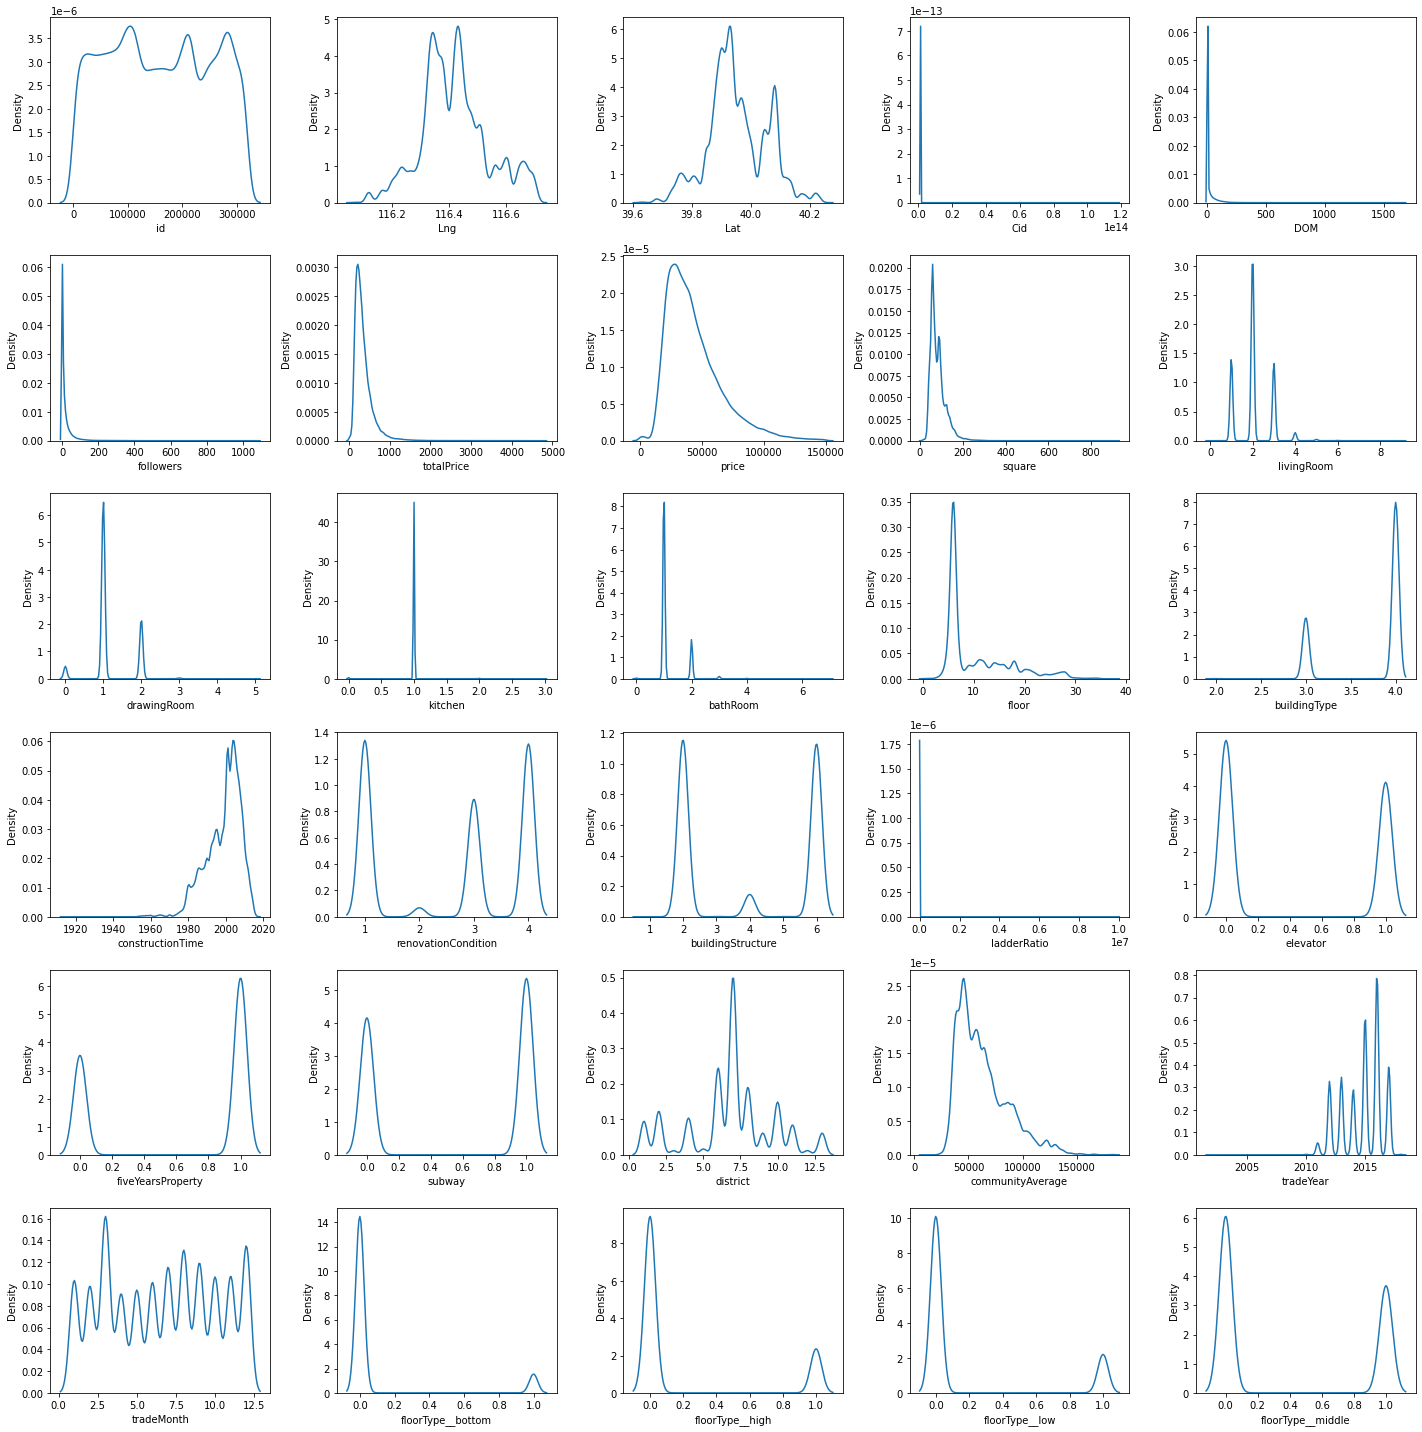

In [27]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20), layout="tight")
fig.tight_layout()
cols = df.columns
for i, ax in enumerate(axes.flatten()):
    col = cols[i]
    sns.kdeplot(data=df, x=col, ax=ax)

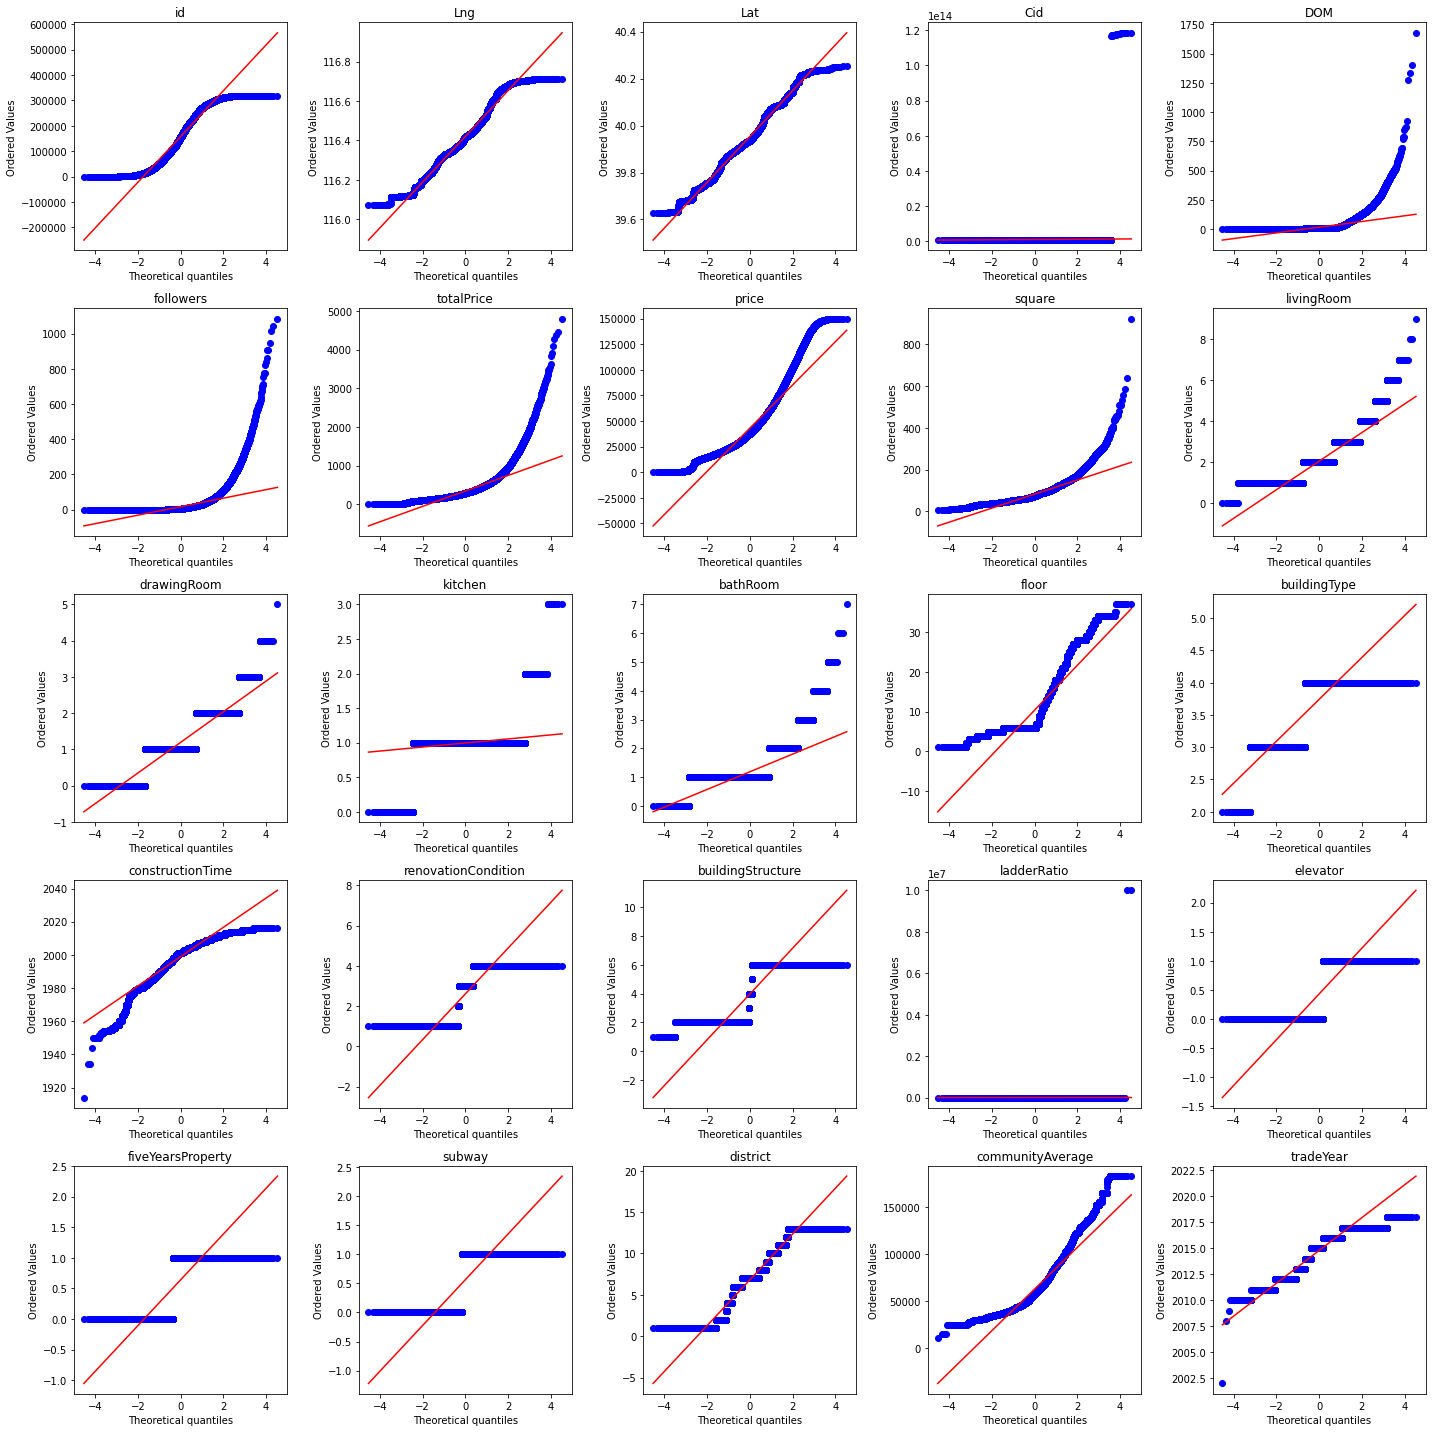

In [28]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), layout="tight")
fig.tight_layout()
cols = df.columns
for i, ax in enumerate(axes.flatten()):
    col = cols[i]
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(col)

# Fix skewed distributions

In [29]:
yjt = vt.YeoJohnsonTransformer(variables = ['totalPrice', 'price', 'square'])
df = yjt.fit_transform(df)

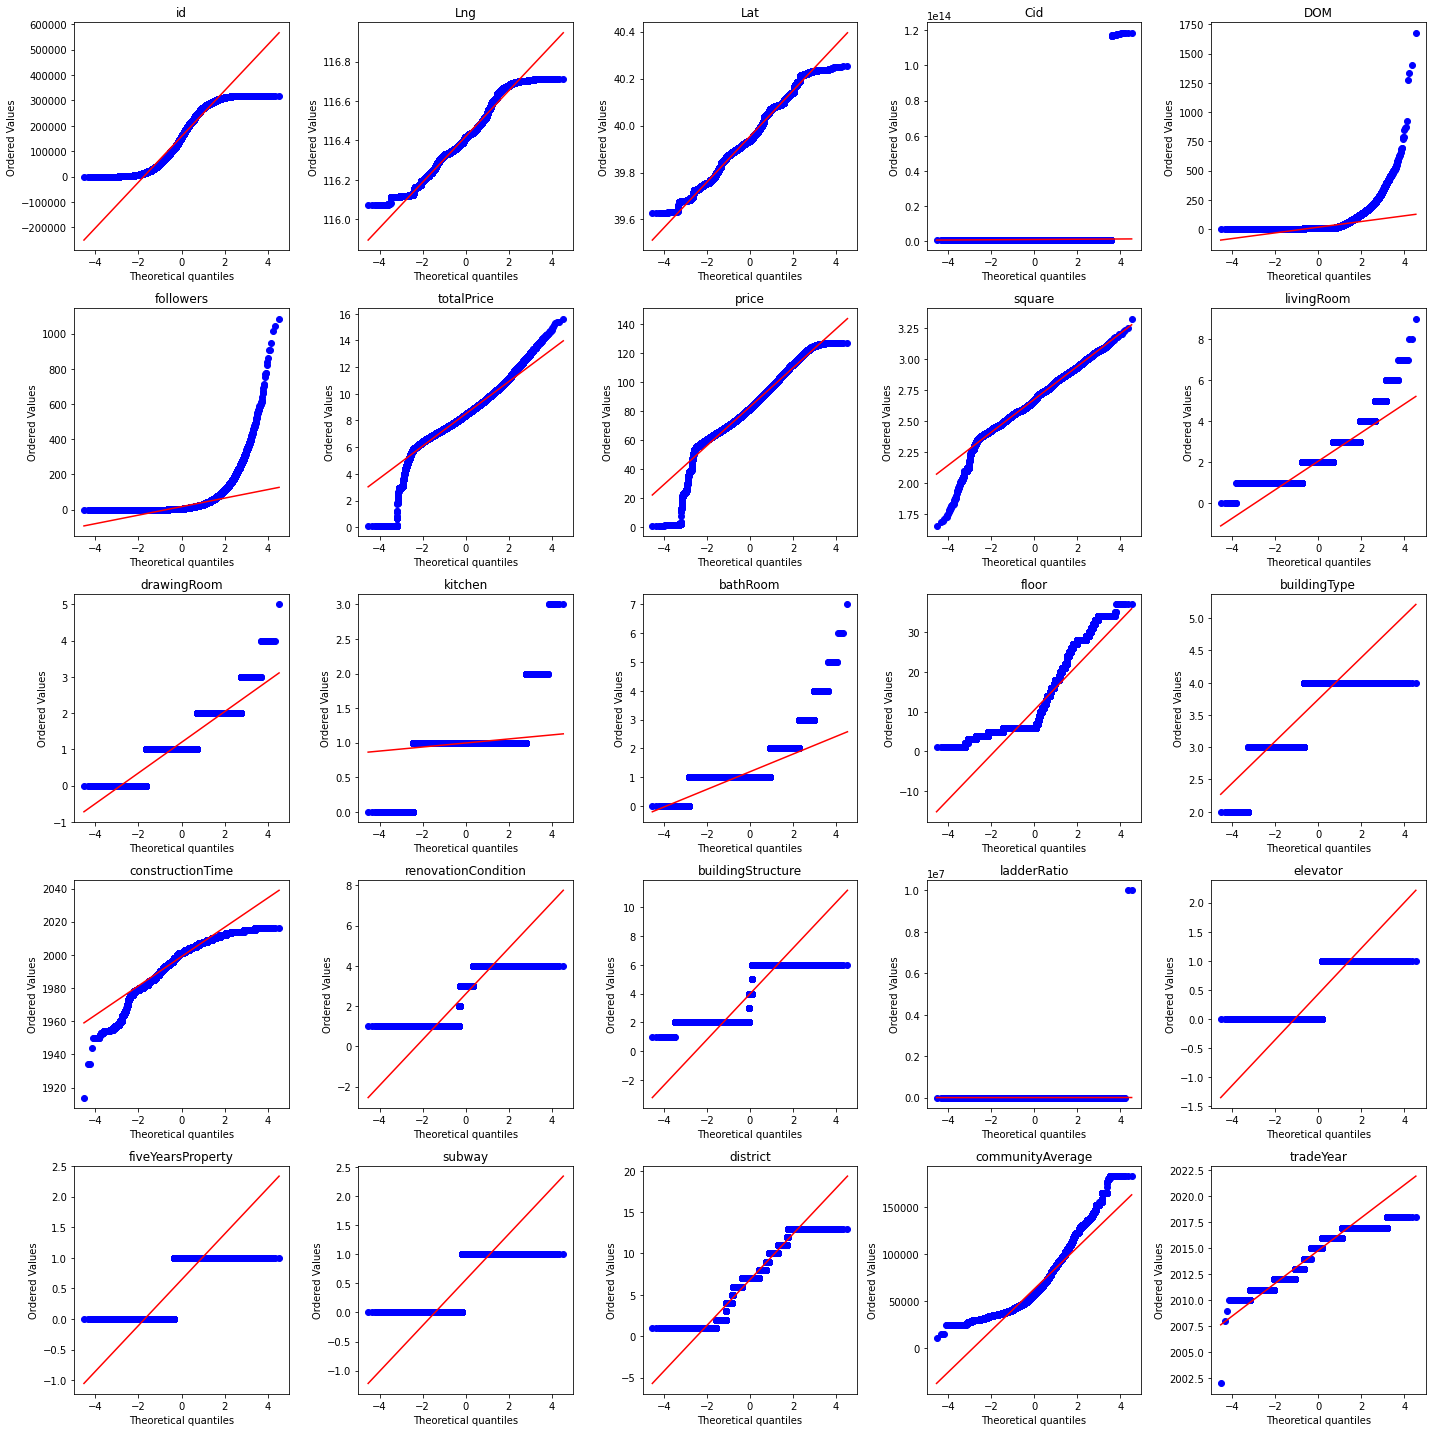

In [30]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), layout="tight")
fig.tight_layout()
cols = df.columns
for i, ax in enumerate(axes.flatten()):
    col = cols[i]
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(col)

# Feature selection

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [32]:
df["constructionTime"].unique()

array([2005, 1960, 1997, 2009, 1991, 2008, 2011, 2000, 2004, 2010, 1996,
       1993, 2002, 2001, 2012, 1989, 1998, 2003, 2007, 1990, 1984, 1992,
       2014, 2006, 1985, 1999, 1979, 1981, 1976, 1994, 1975, 1983, 1986,
       1965, 2013, 1995, 1988, 1987, 1982, 2015, 1955, 1980, 1978, 1958,
       1970, 1956, 1977, 1964, 1963, 1967, 2016, 1974, 1973, 1959, 1954,
       1962, 1966, 1957, 1944, 1972, 1971, 1953, 1968, 1961, 1950, 1952,
       1969, 1934, 1914])

In [33]:
X = df.drop(columns=["totalPrice", "price", "id", "Cid"])
Y = df["totalPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

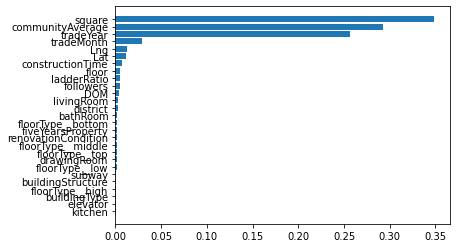

In [35]:
f_i = list(zip(X.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [36]:
# copy df with few columns
preprocessed = df[["square", "communityAverage", "tradeYear", "tradeMonth", "Lng", "Lat", "constructionTime", "totalPrice"]].copy()
preprocessed.to_csv("preprocessed.csv", index=False)
